In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.array as da
import os
import sys
import logging


logging.getLogger('matplotlib.font_manager').disabled = True
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.WARNING)

matplotlib_logger = logging.getLogger('matplotlib')
matplotlib_logger.setLevel(logging.WARNING)

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(src_path)
sys.path.append(src_path)

from src.Analysis import Analysis, AnalysisManager, GR_Confirmation, SpotDetection_Confirmation

c:\Users\Jack\Documents\GitHub\AngelFISH


Loads in the data from specified location

In [2]:
# loc = r"Y:/smFISH_images/Eric_smFISH_images/20230511/GR_ICC_3hr_R1_1nM_10min_050823/GR_ICC_3hr_R1_1nM_10min_050823.h5"
am = AnalysisManager(log_location=r'Y:\Users\Jack\All_Analysis') # change this to your mounted drive location for this folder

In [3]:
# list all analysis done 
am.list_analysis_names()

Analysis_ER_Dec0324_2024-12-19
Analysis_ER_Dec0324_DUSP1_2024-12-19
Analysis_ER_Dec0324_GR_2024-12-20
Analysis_ER_Dec1924_wCyto_2024-12-19


['Analysis_ER_Dec0324_2024-12-19',
 'Analysis_ER_Dec0324_DUSP1_2024-12-19',
 'Analysis_ER_Dec0324_GR_2024-12-20',
 'Analysis_ER_Dec1924_wCyto_2024-12-19']

In [4]:
# can filter on name and dates
am.select_analysis('ER_Dec0324_GR')
print(am.analysis)

[<HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 me

Does analysis/confirmation

In [5]:
# select GR conformation analysis 
GR = GR_Confirmation(am)

In [6]:
# this loads the data into memory 
GR.get_data()

In [ ]:
# This is a temporary fix, I didnt do this in the correct spot in the first run
# this will be fixed in future runs
for h5 in np.unique(GR.cellprops['h5_idx']):
    GR.cellprops.loc[GR.cellprops['h5_idx'] == h5, 'fov'] = pd.Categorical(GR.cellprops.loc[GR.cellprops['h5_idx'] == h5, 'fov']).codes


18    500
2     500
3     500
0     500
1     500
     ... 
9     519
4     519
16    519
6     519
19    519
Name: fov, Length: 350, dtype: int16
12    520
13    520
2     520
6     520
7     520
     ... 
4     539
8     539
0     539
3     539
9     539
Name: fov, Length: 344, dtype: int16
15    680
16    680
7     680
0     680
2     680
     ... 
9     699
13    699
11    699
14    699
10    699
Name: fov, Length: 346, dtype: int16
4     700
3     700
0     700
8     700
10    700
     ... 
9     719
8     719
1     719
6     719
7     719
Name: fov, Length: 329, dtype: int16
3     720
22    720
0     720
2     720
1     720
     ... 
9     739
10    739
7     739
12    739
8     739
Name: fov, Length: 340, dtype: int16
7     540
8     540
13    540
0     540
6     540
     ... 
12    559
16    559
15    559
13    559
14    559
Name: fov, Length: 323, dtype: int16
1     560
2     560
10    560
12    560
11    560
     ... 
10    579
8     579
14    579
13    579
9     579
Name: fo

In [24]:
# make sure this has all the measurements you want
GR.cellprops.keys()

Index(['nuc_label', 'nuc_bbox-0', 'nuc_bbox-1', 'nuc_bbox-2', 'nuc_bbox-3',
       'nuc_area', 'nuc_centroid-0', 'nuc_centroid-1', 'nuc_intensity_max-0',
       'nuc_intensity_max-1', 'nuc_intensity_mean-0', 'nuc_intensity_mean-1',
       'nuc_intensity_min-0', 'nuc_intensity_min-1', 'nuc_intensity_std-0',
       'nuc_intensity_std-1', 'nuc_touching_border', 'cell_label',
       'cell_bbox-0', 'cell_bbox-1', 'cell_bbox-2', 'cell_bbox-3', 'cell_area',
       'cell_centroid-0', 'cell_centroid-1', 'cell_intensity_max-0',
       'cell_intensity_max-1', 'cell_intensity_mean-0',
       'cell_intensity_mean-1', 'cell_intensity_min-0', 'cell_intensity_min-1',
       'cell_intensity_std-0', 'cell_intensity_std-1', 'cell_touching_border',
       'cyto_label', 'cyto_bbox-0', 'cyto_bbox-1', 'cyto_bbox-2',
       'cyto_bbox-3', 'cyto_area', 'cyto_centroid-0', 'cyto_centroid-1',
       'cyto_intensity_max-0', 'cyto_intensity_max-1', 'cyto_intensity_mean-0',
       'cyto_intensity_mean-1', 'cyto_inte

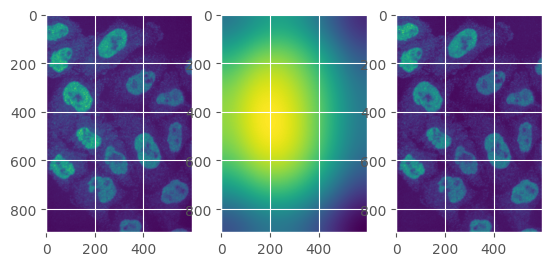

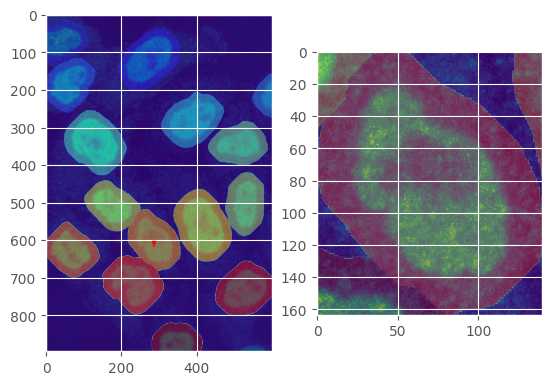

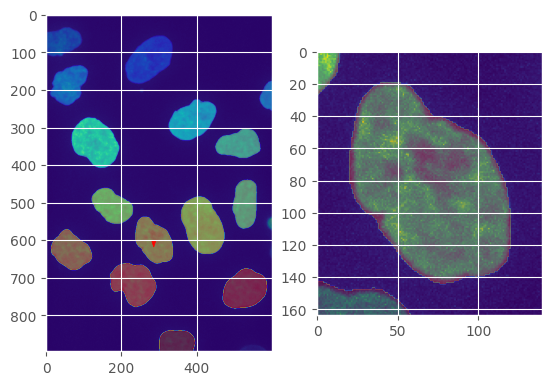

    measurement  numpy calculated  step calculated  are close?
0     cell_area      15558.000000     15558.000000        True
1      nuc_area       8757.000000      8757.000000        True
2     cyto_area       6801.000000      6801.000000        True
3   cell_avgInt          1.426088         1.426088        True
4    nuc_avgInt          1.736442         1.736445        True
5   cell_stdInt               NaN         0.463908       False
6    nuc_stdInt               NaN         0.375243       False
7   cell_maxInt          3.048191         3.048191        True
8    nuc_maxInt          3.048191         3.048191        True
9   cell_minInt          0.616459         0.616459        True
10   nuc_minInt          0.723852         0.723852        True


In [27]:
# run this multiple times to see a new randomly selected cell
GR.display()

In [15]:
GR.cellprops

,nuc_label,nuc_bbox-0,nuc_bbox-1,nuc_bbox-2,nuc_bbox-3,nuc_area,nuc_centroid-0,nuc_centroid-1,nuc_intensity_max-0,nuc_intensity_max-1,...,cyto_intensity_std-1,cyto_touching_border,fov,timepoint,condition,replica,time,Dex_Conc,NAS_location,h5_idx
18,19,768,236,875,352,9483.0,821.993040,294.927660,2.009923,4.435301,...,0.107357,1.0,500,0,GR_timesweep,A,0,0,smFISH_images/Eric_smFISH_images/20230522/GR_I...,0
2,3,20,337,118,414,5385.0,71.991272,373.131662,2.159135,4.640402,...,0.102532,1.0,500,0,GR_timesweep,A,0,0,smFISH_images/Eric_smFISH_images/20230522/GR_I...,0
3,4,131,465,261,576,10367.0,197.741294,521.676473,2.228770,4.399673,...,0.084441,1.0,500,0,GR_timesweep,A,0,0,smFISH_images/Eric_smFISH_images/20230522/GR_I...,0
0,1,0,444,19,513,974.0,7.383984,476.890144,1.803846,3.702838,...,0.127144,1.0,500,0,GR_timesweep,A,0,0,smFISH_images/Eric_smFISH_images/20230522/GR_I...,0
1,2,9,162,99,269,6558.0,52.837450,212.749466,2.259955,5.250562,...,0.550782,1.0,500,0,GR_timesweep,A,0,0,smFISH_images/Eric_smFISH_images/20230522/GR_I...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,9,464,95,599,194,9514.0,525.542884,146.764978,3.849877,5.882750,...,0.122479,1.0,199,0,GR_timesweep,A,90,1,smFISH_images/Eric_smFISH_images/20230516/GR_I...,35
0,1,15,327,97,446,6970.0,54.486944,386.378623,4.390272,5.085583,...,0.108138,1.0,199,0,GR_timesweep,A,90,1,smFISH_images/Eric_smFISH_images/20230516/GR_I...,35
1,2,48,161,154,271,7702.0,101.667359,214.114646,4.249820,7.729602,...,0.152737,1.0,199,0,GR_timesweep,A,90,1,smFISH_images/Eric_smFISH_images/20230516/GR_I...,35
9,10,565,351,682,470,10364.0,623.282902,411.472115,3.692887,5.371088,...,0.115437,1.0,199,0,GR_timesweep,A,90,1,smFISH_images/Eric_smFISH_images/20230516/GR_I...,35
